In [1]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from webscrapping.model.lgbm_model import get_trained_model
import pandas as pd

vm = get_trained_model()

[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
Model loading time: 4.7281513


In [2]:
iex = vm.get_probability_input_example()
iex

{'RegularTime': 0,
 'SpikeTime': 0,
 'ATK_loadoutValue': 20750,
 'ATK_operators': 0,
 'ATK_Initiator': 2,
 'ATK_Duelist': 1,
 'ATK_Sentinel': 1,
 'ATK_Controller': 1,
 'DEF_loadoutValue': 23700,
 'DEF_operators': 0,
 'DEF_Initiator': 2,
 'DEF_Duelist': 1,
 'DEF_Sentinel': 1,
 'DEF_Controller': 1}

In [25]:
iem = vm.get_probability_input_example()
regular_times = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
spike_times = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
regular_proba = []
spike_proba = []
iem["RegularTime"] = 0
iem["SpikeTime"] = 0
for x in regular_times:
    iem["RegularTime"] = x
    regular_proba.append(vm.test_probability(iem))
iem["RegularTime"] = 0
iem["SpikeTime"] = 0
for y in spike_times:
    iem["SpikeTime"] = y
    spike_proba.append(vm.test_probability(iem))

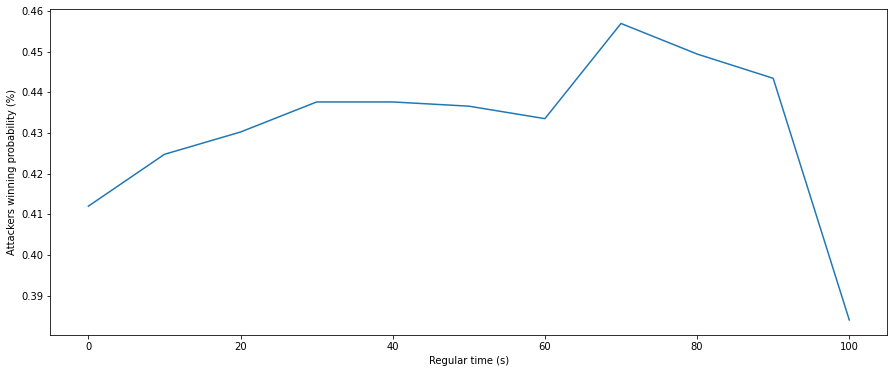

In [18]:
plt.figure(figsize=(15, 6))
plt.xlabel("Regular time (s)")
plt.ylabel("Attackers winning probability (%)")
plt.plot(regular_times, regular_proba)
plt.show()

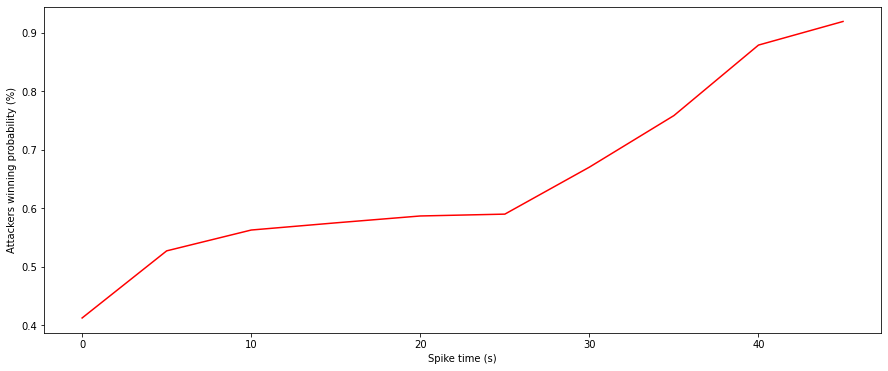

In [20]:
plt.figure(figsize=(15, 6))
plt.xlabel("Spike time (s)")
plt.ylabel("Attackers winning probability (%)")
plt.plot(spike_times, spike_proba, color="red")

In [14]:
vm.model.predict_proba(pd.DataFrame([iem]))

array([[0.08083727, 0.91916273]])

In [28]:
iem["RegularTime"] = 60
iem["SpikeTime"] = 0

In [31]:
vm.test_probability(iem)

0.4335205369012173